<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/regression1_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For Background on the Dataset see: https://cps.ipums.org/cps-action/variables/group

### **Clone Library**

In [ ]:
!git clone https://github.com/pharringtonp19/business-analytics.git

Cloning into 'business-analytics'...
remote: Enumerating objects: 936, done.
remote: Counting objects: 100% (553/553), done.
remote: Compressing objects: 100% (205/205), done.
remote: Total 936 (delta 407), reused 424 (delta 326), pack-reused 383 (from 1)
Receiving objects: 100% (936/936), 17.86 MiB | 10.53 MiB/s, done.
Resolving deltas: 100% (535/535), done.


### **Import Packages**

In [ ]:
import jax
import jax.numpy as jnp
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import statsmodels.formula.api as smf

### **Read In Data Set**

In [ ]:
df = pd.read_csv('/content/business-analytics/datasets/cps_00009.csv.gz', compression="gzip")
df['INCTOT'].replace(999999999, np.nan, inplace=True)
df = df[df['AGE'] <80]

<ipython-input-6-ff998f827f10>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['INCTOT'].replace(999999999, np.nan, inplace=True)


In [ ]:
df.head()

,YEAR,SERIAL,MONTH,CPSID,ASECFLAG,ASECWTH,PERNUM,CPSIDV,CPSIDP,ASECWT,AGE,SEX,RACE,MARST,VETSTAT,FTOTVAL,INCTOT
2,2024,6,3,20230200357800,1,601.57,3,202302003578031,20230200357803,1312.04,15,2,100,6,0,0,0.0
3,2024,7,3,20230100363800,1,1559.99,1,202301003638011,20230100363801,1559.99,53,2,100,1,1,50838,10801.0
4,2024,7,3,20230100363800,1,1559.99,2,202301003638021,20230100363802,1559.99,52,1,100,1,1,50838,40037.0
5,2024,8,3,20240200366300,1,580.60,1,202402003663011,20240200366301,580.60,68,1,100,5,1,9648,9648.0
6,2024,8,3,20240200366300,1,580.60,2,202402003663021,20240200366302,1351.94,14,2,100,6,0,9648,NaN


### **Check NAN Values**

In [ ]:
print(df['AGE'].isna().sum(), df['INCTOT'].isna().sum())
condition = df['AGE'].isna() | df['INCTOT'].isna()
df = df[~condition]

0 28429


### **Plot**

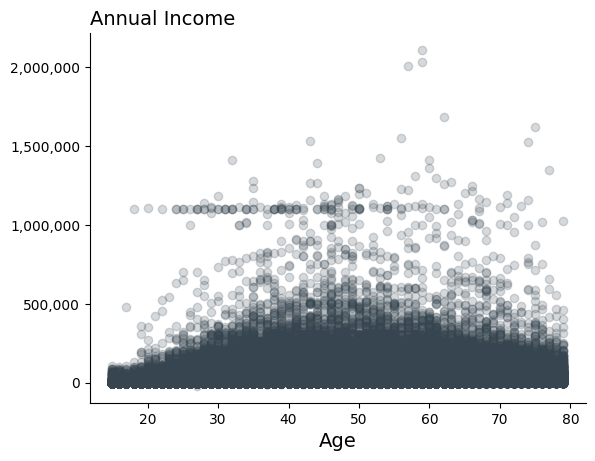

In [ ]:
plt.scatter(df['AGE'], df['INCTOT'], color="#36454F", alpha=0.2)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('Age', size=14)
plt.title('Annual Income', size=14, loc='left')
plt.show()

### **Random Lines**

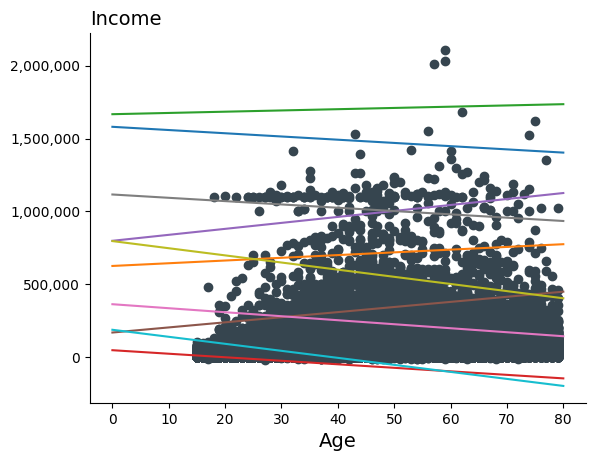

In [ ]:
def affine_f(x, params):
  return params[0] + x*params[1]

def random_line(key):
  k1, k2 = jax.random.split(key)
  xs = jnp.linspace(0, 80, 10)
  p1, p2 = jax.random.uniform(k1, minval=0, maxval=2_000_000), jax.random.uniform(k2, minval=-5000, maxval=5000)
  params = jnp.array([p1, p2])
  ys = affine_f(xs, params)
  return xs, ys

plt.scatter(df['AGE'], df['INCTOT'], color="#36454F")

key = jax.random.PRNGKey(0)
for i in range(10):
  key, _ = jax.random.split(key)
  plt.plot(*random_line(key))
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('Age', size=14)
plt.title('Income', size=14, loc='left')
plt.show()

### **Data Space & Parameter Space**

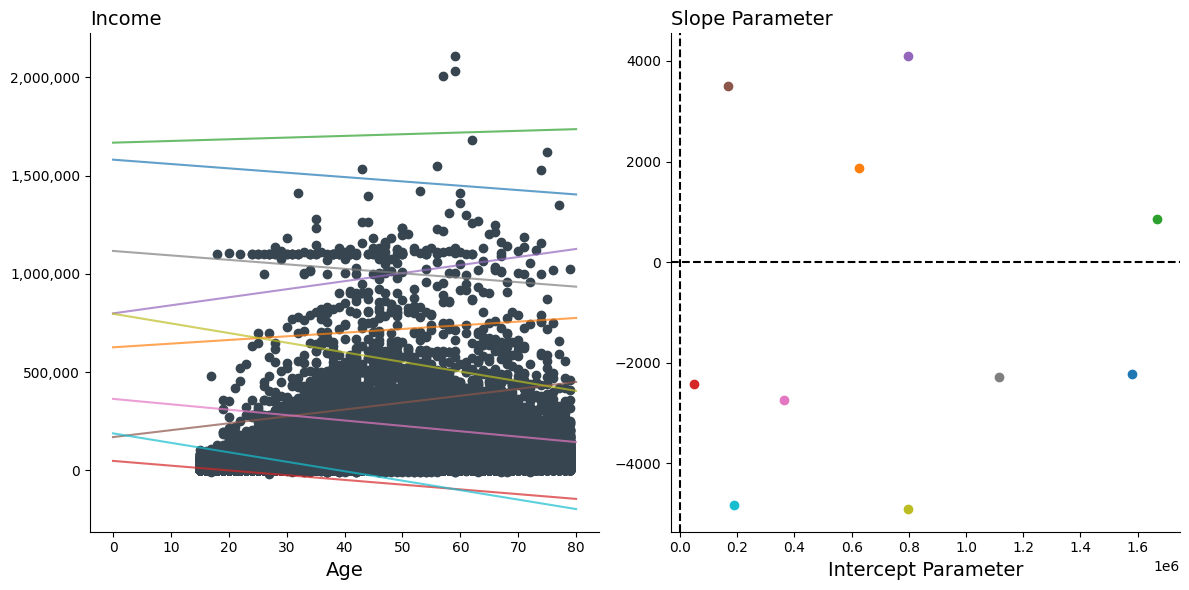

In [ ]:
def random_line(key):
  k1, k2 = jax.random.split(key)
  xs = jnp.linspace(0, 80, 10)
  p1, p2 = jax.random.uniform(k1, minval=0, maxval=2_000_000), jax.random.uniform(k2, minval=-5000, maxval=5000)
  params = jnp.array([p1, p2])
  ys = affine_f(xs, params)
  return xs, ys, params

# Generate main plot and parameter space subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot of size vs. price
ax1.scatter(df['AGE'], df['INCTOT'], color="#36454F")
key = jax.random.PRNGKey(0)

params_list = []
for i in range(10):
    key, _ = jax.random.split(key)
    xs, ys, params = random_line(key)
    ax1.plot(xs, ys, alpha=0.7)
    params_list.append(params)


ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax1.set_xlabel('Age', size=14)
ax1.set_title('Income', size=14, loc='left')


for p in params_list:
  plt.scatter(p[0], p[1])
ax2.set_xlabel('Intercept Parameter', size=14)
ax2.set_title('Slope Parameter', size=14, loc='left')
ax2.axhline(0, linestyle='--', color='black')
ax2.axvline(0, linestyle='--', color='black')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()